<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Aprendizaje Supervisado</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Técnicas de Inteligencia Artificial - Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Prof. Daniel Vargas Medina</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: davargasme@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERIA MECATRONICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="fig/Escudo_UN.png",width=100,height=100>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>05 de mayo de 2022</p>

# OpenCV: Normal Bayes Classifier

* cv2.ml.NormalBayesClassifier_create() → NormalBayesClassifier object

* NormalBayesClassifierObj.train(trainData, layout, responses) → retval

* NormalBayesClassifierObj.predict(samples) → retval, results

https://docs.opencv.org/4.5.5/d4/d8e/classcv_1_1ml_1_1NormalBayesClassifier.html

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

from scipy import signal
from scipy import misc

from sklearn import neighbors, datasets

OpenCV Version : 4.5.5 


In [14]:
import getopt
import sys

#samples, responses = load_base('fig/Notebook/Datos.data')
samples = np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], 
             [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
responses = np.array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])
samples = np.float32(samples)
#responses = np.float32(responses)
a = 0 # Vectores de característica en fila

print ("Muestras")
print (samples)
print ("Clases")
print (responses)
#layout=cv2.ml.ROW_SAMPLE

# Creación del clasificador
Clasificador_NB = cv2.ml.NormalBayesClassifier_create()

# Entrenamiento
Clasificador_NB.train(samples, a, responses)

# Evaluación con muestras de entrenamiento
retval, results = Clasificador_NB.predict(samples)

print ("Clase salida")
print (results.ravel())


Muestras
[[-3.  7.]
 [ 1.  5.]
 [ 1.  2.]
 [-2.  0.]
 [ 2.  3.]
 [-4.  0.]
 [-1.  1.]
 [ 1.  1.]
 [-2.  2.]
 [ 2.  7.]
 [-4.  1.]
 [-2.  7.]]
Clases
[0 0 0 0 1 0 0 1 0 1 1 1]
Clase salida
[1 1 1 0 1 0 0 0 0 1 0 1]


(180000, 1)
(450, 400)


C:\Users\JuanLuis\AppData\Local\Temp/ipykernel_5428/2291815850.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


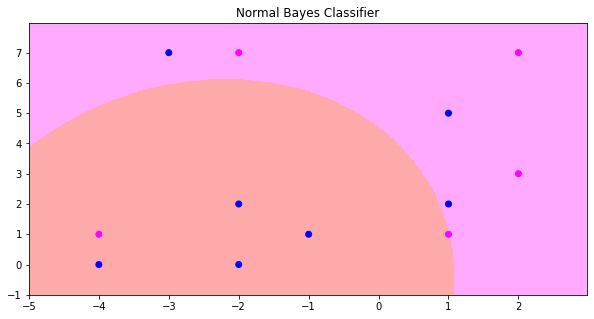

In [15]:
# VISUALIZACION

#Datos
X = np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], 
             [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])

X = np.float32(X)

#Clases
y = np.array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])
y = np.float32(y)

# step size in the mesh
h = .02  

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF'])
cmap_bold = ListedColormap(['#0000FF', '#00FF00', '#FF0000', '#FFFF00', '#FF00FF'])


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

samples = np.float32(np.c_[xx.ravel(), yy.ravel()])
retval, results = Clasificador_NB.predict(samples)

print (results.shape)
                                          
# Put the result into a color plot
Z = results.reshape(xx.shape)
print (Z.shape)

plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Normal Bayes Classifier")

plt.show()


# OpenCV: KNearest Classifier



* cv2.ml.KNearest.train(trainData, layout, responses) → retva

* KNearestClasifier.findNearest(samples, k) → retval, results, neighborResponses, dists

https://docs.opencv.org/4.5.5/dd/de1/classcv_1_1ml_1_1KNearest.html

In [3]:
import getopt
import sys

#samples, responses = load_base('fig/Notebook/Datos.data')
samples = np.array([[-3.0,7.0],[1.0,5.0], [1.0,2.0], [-2.0,0.0], [2.0,3.0], [-4.0,0.0], 
             [-1.0,1.0], [1.0,1.0], [-2.0,2.0], [2.0,7.0], [-4.0,1.0], [-2.0,7.0]])
responses = np.array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0])
samples = np.float32(samples)
responses = np.float32(responses)

print ("samples")
print (samples)
print ("responses")
print (responses)

Clasificador_KNN = cv2.ml.KNearest_create()

#train
Clasificador_KNN.train(samples, cv2.ml.ROW_SAMPLE, responses)

#predict(self, samples):
retval, results, neigh_resp, dists = Clasificador_KNN.findNearest(samples, k = 1)

print ("Results")
print (results.ravel())


samples
[[-3.  7.]
 [ 1.  5.]
 [ 1.  2.]
 [-2.  0.]
 [ 2.  3.]
 [-4.  0.]
 [-1.  1.]
 [ 1.  1.]
 [-2.  2.]
 [ 2.  7.]
 [-4.  1.]
 [-2.  7.]]
responses
[0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
Results
[0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.]


(180000, 1)
(450, 400)


C:\Users\JuanLuis\AppData\Local\Temp/ipykernel_1768/1556037054.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


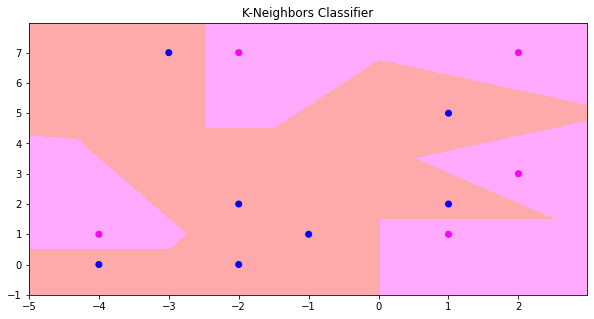

In [12]:
#Datos
X = np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], 
             [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])

X = np.float32(X)

#Clases
y = np.array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])
y = np.float32(y) 

#Clasificador
Clasificador_KNN = cv2.ml.KNearest_create()
Clasificador_KNN.train(X, cv2.ml.ROW_SAMPLE, y)



# VISUALIZACION
# step size in the mesh
h = .02  

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF'])
cmap_bold = ListedColormap(['#0000FF', '#00FF00', '#FF0000', '#FFFF00', '#FF00FF'])



# we create an instance of Neighbours Classifier and fit the data.
#clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
#clf.fit(X, y)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


samples = np.float32(np.c_[xx.ravel(), yy.ravel()])
retval, results, neigh_resp, dists = Clasificador_KNN.findNearest(samples, k = 1)

print (results.shape)
                                          
# Put the result into a color plot
Z = results.reshape(xx.shape)
print (Z.shape)

plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-Neighbors Classifier")

plt.show()
